In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from data_utils import load_dataset, prepare_task, get_students, get_task_number, get_task_name

data_folder = '../data/'

In [2]:
data = load_dataset(data_folder)
snapshots = data['program_snapshots']
tasks = data['task_sessions']

In [3]:
# Total number of different programs
print('Users have created', len(list(set(list(snapshots['program'])))), 'different programs')

Users have created 19168 different programs


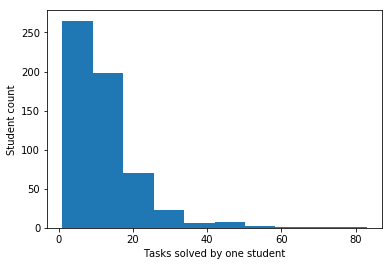

In [4]:
# Histogram - how many tasks users solved
x = list(tasks.loc[tasks['solved'] == True].groupby(by='student').size())
plt.hist(x)
plt.xlabel('Tasks solved by one student')
plt.ylabel('Student count')
plt.show()

[2, 13, 1, 19, 4, 1, 2, 1, 2, 1, 1, 2, 5, 1, 20, 5, 2, 1, 3, 1, 3, 8, 1, 24, 6, 3, 10, 1, 1, 34, 1, 1, 1, 2, 1, 7, 5, 1, 2, 13, 9, 1, 5, 3, 1, 1, 1, 34, 1, 2, 13, 13, 11, 20, 15, 11, 10, 13, 23, 10, 1, 6, 5, 8, 8, 14, 6, 14, 1, 2, 3, 11, 7, 1, 4, 2, 1, 23, 1, 5, 1, 1, 5, 23, 33, 15, 26, 3, 7, 4, 1, 10, 7, 19, 1, 3, 4, 6, 13, 7, 10, 11, 8, 6, 4, 4, 11, 6, 2, 3, 3, 1, 5, 17, 2, 1, 1, 25, 4, 1, 2, 1, 2, 1, 1, 12, 1, 3, 1, 1, 7, 1, 8, 1, 4, 4, 1, 1, 1, 4, 1, 1, 29, 1, 1, 1, 2, 13, 13, 1, 2, 26, 2, 1, 1, 3, 8, 1, 21, 1, 5, 12, 12, 29, 6, 1, 1, 10, 13, 15, 16, 5, 10, 22, 21, 14, 17, 21, 1, 1, 6, 18, 1, 1, 5, 1, 25, 2, 100, 76, 4, 3, 14, 1, 1, 16, 15, 10, 2, 5, 11, 1, 1, 1, 1, 4, 3, 3, 1, 21, 10, 1, 1, 1, 5, 2, 7, 2, 6, 14, 5, 1, 1, 1, 10, 11, 1, 10, 5, 14, 20, 7, 10, 1, 4, 5, 2, 1, 1, 5, 1, 1, 1, 1, 4, 1, 1, 3, 12, 1, 17, 8, 1, 13, 6, 3, 1, 1, 72, 2, 2, 1, 1, 18, 1, 1, 1, 3, 1, 10, 10, 6, 19, 1, 3, 1, 3, 16, 1, 1, 5, 1, 5, 13, 2, 23, 7, 3, 1, 1, 9, 3, 9, 1, 1, 1, 1, 10, 1, 12, 5, 1, 6, 2, 27

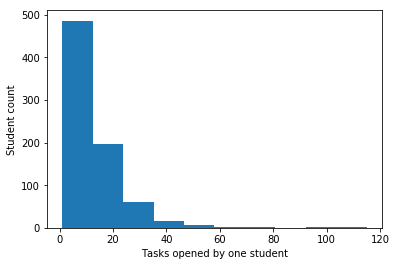

In [23]:
# Histogram - how many tasks users opened
x = list(tasks.groupby(by='student').size())
print(x)
plt.hist(x)
plt.xlabel('Tasks opened by one student')
plt.ylabel('Student count')
plt.show()

In [9]:
print(len(list(set(tasks['student']))))

770


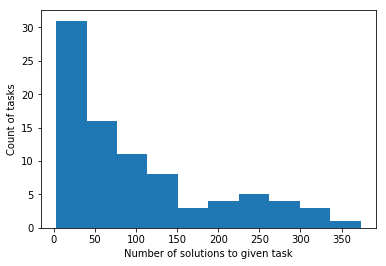

In [27]:
x = list(tasks.groupby(by='task').size())
plt.hist(x)
plt.xlabel('Number of solutions to given task')
plt.ylabel('Count of tasks')
plt.show()

In [35]:
student_count = len(list(set(tasks['student'])))
task_count = len(list(set(tasks['task'])))
solution_matrix = np.zeros((student_count, task_count))
print(solution_matrix.shape)

# student_id -> student number in matrix
student_dict = {}
students_in_dict = 0
for row in tasks.iterrows():
    student_id = row[1]['student']
    in_dict = student_dict.get(student_id, -1)
    if in_dict == -1:
        student_dict[student_id] = students_in_dict
        students_in_dict += 1


(770, 86)


In [40]:
for row in tasks.iterrows():
    student_id = row[1]['student']
    task_id = row[1]['task']
    student_dict_id = student_dict[student_id]
    
    solution_matrix[student_dict_id, task_id - 1] = 1

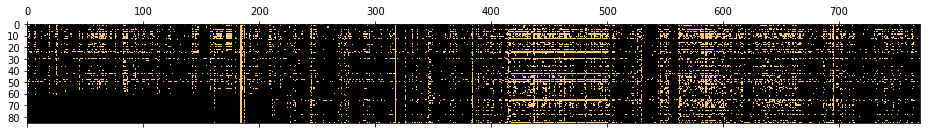

In [46]:
plt.matshow(solution_matrix.T, cmap=cm.copper)
plt.show()

In [48]:
solution_matrix.sort()

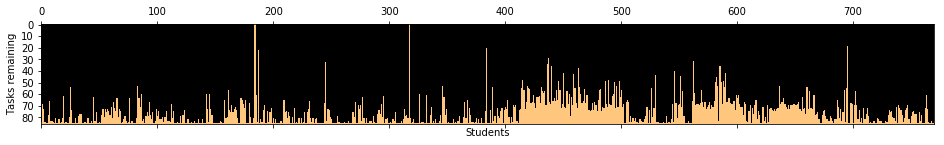

In [58]:
plt.matshow(solution_matrix.T, cmap=cm.copper)
plt.xlabel('Students')
plt.ylabel('Tasks remaining')
plt.show()

In [61]:
print('Average of tasks solved by student:', solution_matrix.sum(axis=1).mean())

Average of tasks solved by student: 10.583116883116883


In [64]:
data['levels']

id  level             name  credits            toolbox  \
0   1      1            moves        6                fly   
1   2      2            world       25              shoot   
2   3      3           repeat       40             repeat   
3   4      4            while       60              while   
4   5      5            loops      100              loops   
5   6      6               if      150           loops+if   
6   7      7        comparing      200  loops+if+position   
7   8      8          if-else      300      loops+if+else   
8   9      9  final-challenge     1000           complete   

                                               tasks  
0  ['turning-left-and-right', 'beware-of-asteroid...  
1  ['tunnel', 'shot', 'shooting', 'wormhole-demo'...  
2  ['ladder', 'n', 'steal-the-nose', 'diamonds-in...  
3  ['zig-zag', 'yellow-is-not-red', 'direction-ch...  
4  ['big-slalom', 'arrow', 'double-bend', 'diamon...  
5  ['diamonds-with-signals', 'on-yellow-to-left',...  
6  ['diamond-lines', 'slalom-position-testing', '...  
7  ['colorful-flowers', 'bouncing-from-edge', 'co...  
8  ['two-color-tracks', 'wormhole-cloud', 'triple...

In [14]:
task_id_level = zip(data['tasks']['id'].tolist(), data['tasks']['level'].tolist())
id_to_level = {key: value for key, value in task_id_level}
id_to_level

{1: 'repeat',
 2: 'moves',
 3: 'while',
 4: 'final-challenge',
 5: 'if',
 6: 'world',
 7: 'comparing',
 8: 'world',
 9: 'comparing',
 10: 'world',
 11: 'repeat',
 12: 'world',
 13: 'repeat',
 14: 'moves',
 15: 'final-challenge',
 16: 'if-else',
 17: 'while',
 18: 'repeat',
 19: 'world',
 20: 'final-challenge',
 21: 'repeat',
 22: 'if-else',
 23: 'world',
 24: 'if-else',
 25: 'moves',
 26: 'moves',
 27: 'if',
 28: 'comparing',
 29: 'if-else',
 30: 'final-challenge',
 31: 'moves',
 32: 'loops',
 33: 'final-challenge',
 34: 'if',
 35: 'final-challenge',
 36: 'final-challenge',
 37: 'loops',
 38: 'while',
 39: 'final-challenge',
 40: 'final-challenge',
 41: 'while',
 42: 'final-challenge',
 43: 'if-else',
 44: 'moves',
 45: 'final-challenge',
 46: 'repeat',
 47: 'loops',
 48: 'comparing',
 49: 'moves',
 50: 'loops',
 51: 'moves',
 52: 'loops',
 53: 'while',
 54: 'final-challenge',
 55: 'loops',
 56: 'loops',
 57: 'repeat',
 58: 'loops',
 59: 'if',
 60: 'if',
 61: 'final-challenge',
 62: 'f

In [78]:
# solutions of given level
solution_dict = {}
for row in tasks.iterrows():
    level = id_to_level[row[1]['task']]
    solution_dict[level] = 1 + solution_dict.get(level, 0)

In [79]:
solution_dict

{'comparing': 174,
 'final-challenge': 222,
 'if': 312,
 'if-else': 69,
 'loops': 741,
 'moves': 3071,
 'repeat': 1391,
 'while': 756,
 'world': 1591}

In [93]:
grouped_tasks = tasks.groupby(by='task').size()
named_tasks = {}
for row in grouped_tasks.items():
    named_tasks[id_to_level[row[0]]] = row[1]

In [94]:
named_tasks

{'comparing': 18,
 'final-challenge': 6,
 'if': 43,
 'if-else': 12,
 'loops': 57,
 'moves': 215,
 'repeat': 97,
 'while': 82,
 'world': 170}

In [27]:
# sort task by number of sessions
task_count_list = list(tasks.groupby(by='task').count()['id'])
id_name_list = [(get_task_name(ide, data), id_to_level[ide], ide, task_count_list[ide - 1]) for ide in list(tasks.groupby(by='task').count().index)]

In [29]:
sorted(id_name_list, key=lambda x: x[3], reverse=True)

[('turning-left-and-right', 'moves', 2, 373),
 ('one-step-forward', 'moves', 51, 316),
 ('beware-of-asteroid', 'moves', 14, 304),
 ('diamond-on-right', 'moves', 31, 299),
 ('three-steps-forward', 'moves', 25, 297),
 ('turning-left', 'moves', 44, 297),
 ('turning-right', 'moves', 49, 280),
 ('shot', 'world', 10, 262),
 ('tunnel', 'world', 6, 257),
 ('turning-right-and-left', 'moves', 26, 254),
 ('wormhole-demo', 'world', 12, 246),
 ('shooting', 'world', 8, 237),
 ('plus', 'moves', 67, 228),
 ('dont-forget-shot', 'world', 23, 215),
 (None, 'moves', 86, 215),
 ('surrounded-diamond', 'moves', 66, 208),
 ('2diamonds-2meteorids', 'world', 19, 204),
 ('last-shot', 'world', 79, 170),
 ('ladder', 'repeat', 11, 166),
 ('steal-the-nose', 'repeat', 21, 154),
 ('n', 'repeat', 13, 150),
 ('find-the-path', 'repeat', 46, 141),
 ('clean-your-path', 'repeat', 18, 131),
 ('direction-change', 'while', 38, 131),
 ('zig-zag', 'while', 3, 130),
 ('diamonds-in-meteoroid-cloud', 'repeat', 1, 128),
 ('stairs', 